In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import glob

# 트레인 이미지 불러오기

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지 불러오기
image_path = "rock_scissors_paper/scissors"
resize_images(image_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 이미지 불러오기

image_path = "rock_scissors_paper/rock"
resize_images(image_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [4]:
# 보 이미지 불러오기

image_path = "rock_scissors_paper/paper"
resize_images(image_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### 이미지 라벨링

In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    img_color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*img_color,dtype=np.int32).reshape(number_of_data,img_size,img_size,img_color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_path = "rock_scissors_paper"
(x_train, y_train)=load_data(image_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


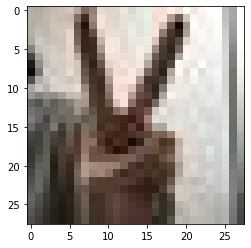

In [38]:
plt.imshow(x_train[27])
print('라벨: ', y_train[27])

# 딥러닝 네트워크 설계하기

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape =(28,28,3)))
                             #얼마나 다양한 이미지의 특징을 살펴볼 것인가?               #color 이미지
                             #(입력 이미지가 다양할 수록 더 많은 특징을 고려)
                             #필터 개수 -> 현재는 한 이미지에서 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
                            #분류기 알고리즘을 얼마나 복잡하게 할 것인가?
                            #(복잡한 문제일수록 이 수를 늘림)
model.add(keras.layers.Dense(3, activation='softmax'))
                            #최종 분류기의 class 수
                            #여기서는 총 3개의 class를 구분하므로 3
        

print('Model에 추가된 Layer 개수 : ', len(model.layers))

Model에 추가된 Layer 개수 :  7


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## 모델 학습

In [10]:
model.compile(optimizer='Nadam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train_norm, y_train, epochs=10)

train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose =2)

print("train_loss: {}".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

Epoch 1/10
10/10 [==============================] - 1s 17ms/step - loss: 1.1187 - accuracy: 0.3332
Epoch 2/10
10/10 [==============================] - 0s 19ms/step - loss: 0.9989 - accuracy: 0.5847
Epoch 3/10
10/10 [==============================] - 0s 17ms/step - loss: 0.8501 - accuracy: 0.6814
Epoch 4/10
10/10 [==============================] - 0s 17ms/step - loss: 0.6898 - accuracy: 0.7682
Epoch 5/10
10/10 [==============================] - 0s 17ms/step - loss: 0.6058 - accuracy: 0.7830
Epoch 6/10
10/10 [==============================] - 0s 15ms/step - loss: 0.5003 - accuracy: 0.8245
Epoch 7/10
10/10 [==============================] - 0s 16ms/step - loss: 0.4166 - accuracy: 0.8460
Epoch 8/10
10/10 [==============================] - 0s 15ms/step - loss: 0.3255 - accuracy: 0.9183
Epoch 9/10
10/10 [==============================] - 0s 15ms/step - loss: 0.2978 - accuracy: 0.9075
Epoch 10/10
10/10 [==============================] - 0s 34ms/step - loss: 0.2511 - accuracy: 0.9333
10/10 - 0

# 테스트 이미지 불러오기

In [11]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "test/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지 불러오기

image_dir_path = "test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지 불러오기
image_dir_path = "test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### 이미지 라벨링

In [12]:
import numpy as np

def load_data(img_path, number_of_data=300):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("평가데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

평가데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [13]:
model.compile(optimizer='Nadam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_test_norm, y_test, epochs=10)

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose =2)

print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
10/10 [==============================] - 1s 15ms/step - loss: 1.8399 - accuracy: 0.3100
Epoch 2/10
10/10 [==============================] - 0s 17ms/step - loss: 0.9593 - accuracy: 0.5134
Epoch 3/10
10/10 [==============================] - 0s 24ms/step - loss: 0.8460 - accuracy: 0.5860
Epoch 4/10
10/10 [==============================] - 0s 17ms/step - loss: 0.6886 - accuracy: 0.6718
Epoch 5/10
10/10 [==============================] - 0s 19ms/step - loss: 0.6712 - accuracy: 0.6903
Epoch 6/10
10/10 [==============================] - 0s 17ms/step - loss: 0.6199 - accuracy: 0.6993
Epoch 7/10
10/10 [==============================] - 0s 14ms/step - loss: 0.5385 - accuracy: 0.7739
Epoch 8/10
10/10 [==============================] - 0s 14ms/step - loss: 0.5184 - accuracy: 0.7917
Epoch 9/10
10/10 [==============================] - 0s 15ms/step - loss: 0.4785 - accuracy: 0.7764
Epoch 10/10
10/10 [==============================] - 0s 17ms/step - loss: 0.4571 - accuracy: 0.8073
10/10 - 0

# 회고

## 시도

### optimizer별 트레인/테스트 성능


- Adam : train : 0.9399 / test : 0.7933
- AdaGrad : train : 0.4900 / test : 0.6200
- AdaMax : train : 0.7800 / test : 0.6633
- RMSprop : train : 0.9467  / test : 0.8000
- Nadam : train : 0.9200 / test : 0.8266

머신러닝처럼 따로 feature engineering을 할 부분이 없기 때문에, 수작업으로 성능 향상을 위해 할 수 있는 것을 찾아 보았고 가장 먼저 하이퍼 파라미터 튜닝을 시도해 보았다. 구글링을 통해 다양한 optimizer를 찾았고 하나씩 대입해본 결과 'Nadam'으로 했을 때 테스트 성능이 가장 좋았다.


### reshape

흑백으로 처리를 하면 학습 속도가 더 빨라질 것으로 생각해 컬러 이미지를 흑백으로 바꿀 수 있도록 reshape 하였다.
그렇게 될 경우 x의 shape가 (900, 28, 28, 1)로 바뀌어서 y의 shape과 맞지 않아 에러가 발생했다. 3차원을 1차원으로 바꾸는 것이기 때문에 (300, 28, 28, 3)이 (900, 28, 28, 1)로 변하는 것은 불가피했고, 300으로 유지한 채 흑백(1)으로 변환하는 방법을 찾지 못했다. 따라서 LMS 실습과는 달리 x에 대해서 reshape를 진행하지 않았다.


### Dense의 크기와 Conv2D의 크기가 왜 2의 제곱으로 커지는 지

Dense의 크기와 Conv2D의 크기가 왜 2의 제곱으로 커지는 지 궁금해서 찾아보았다.
conv2d 등의 레이어를 적용할 경우 피쳐 맵의 사이즈가 2로 나누어지고, pooling 진행할 때 4로 나누어지기 때문에 2의 제곱수로 커진다는 것을 유추해볼 수 있었다.

## 후기

직접 이미지 데이터를 만들어서 CNN을 진행한 건 처음이어서 학습할 데이터를 만드는 것에서 부터 다양한 생각이 들었다. 손의 모양을 컴퓨터가 잘 학습할 수 있도록 뚜렷하게 사진을 찍어야 할 지, 가까이서 찍어야 할 지, 멀리서 찍어야 할 지 등등 단순히 데이터를 받아오고 구글링을 해서 코드를 완성하는 것보다 재미있었다. 이번 과제 한 번으로 CNN을 명확히 알게된 건 아니지만 큰 흐름은 파악할 수 있었다. 

**향후 시도해보고 싶은 것**

- 랜덤 서치로 하이퍼 파라미터 튜닝하기
- keras의 다른 모델도 사용해보기